In [ ]:
JOB_ID – the unique identity of the work order.
 JOB_TYPE – the type of job performed.
 DEPTH_M – the depth of the pipe (m).
 DIAMETER_MM – the diameter of the pipe (mm).
 MATERIAL – the material of the pipe.
 LENGTH_M – the length of the pipe (m).
 JOB_COST – the cost of the job (£).

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
os.chdir("/Users/maciejmaciej/Desktop/arcarids gen")

In [3]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/maciejmaciej/Desktop/arcarids gen


In [4]:
files = os.listdir(os.curdir)
print(files)

['.DS_Store', 'Example_Work_Orders.xlsx', 'ArcadisGen Exercise.ipynb', 'Example Work Orders.csv']


In [5]:
arca = pd.read_excel("Example_Work_Orders.xlsx")

In [6]:
arca.head(5)

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,Job 1,Replace,2.19,200,ST,31.55,19847.644300
1,Job 2,Replace,2.27,63,AC,15.14,4476.588985
2,Job 3,Repair,3.64,450,ST,15.17,16871.484850
3,Job 4,Replace,2.28,200,AC,15.64,11158.144200
4,Job 5,Replace,2.40,200,ST,39.23,16913.611580


 JOB_ID – the unique identity of the work order. -  str
 JOB_TYPE – the type of job performed. - str (binary)
 DEPTH_M – the depth of the pipe (m). - float
 DIAMETER_MM – the diameter of the pipe (mm). - int
 MATERIAL – the material of the pipe. - str
 LENGTH_M – the length of the pipe (m). -float
 JOB_COST – the cost of the job (£). - float

In [7]:
arca.describe()

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST
count,5000.000000,5000.000000,5000.000000,4994.000000
mean,2.670232,733.001000,25.137914,10207.698215
std,0.853085,24486.875116,9.097207,9534.848466
min,-4.660000,50.000000,8.160000,586.506169
25%,2.000000,63.000000,17.810000,3978.863093
50%,2.570000,90.000000,23.785000,6986.901196
75%,3.270000,200.000000,31.665000,12884.617365
max,4.980000,999999.000000,49.710000,85860.133000


In [8]:
arca.shape

(5000, 7)

In [10]:
arca.JOB_COST.describe()

count     4994.000000
mean     10207.698215
std       9534.848466
min        586.506169
25%       3978.863093
50%       6986.901196
75%      12884.617365
max      85860.133000
Name: JOB_COST, dtype: float64

In [11]:
arca.isnull().any()

JOB_ID         False
JOB_TYPE       False
DEPTH_M        False
DIAMETER_MM    False
MATERIAL       False
LENGTH_M       False
JOB_COST        True
dtype: bool

In [31]:
arca.isnull().sum()

JOB_ID         0
JOB_TYPE       0
DEPTH_M        0
DIAMETER_MM    0
MATERIAL       0
LENGTH_M       0
JOB_COST       6
dtype: int64

In [30]:
#here we display all the rows where JOB_COST has no values
arcan = arca[arca.isnull().any(axis=1)]
print(arcan)

        JOB_ID JOB_TYPE  DEPTH_M  DIAMETER_MM MATERIAL  LENGTH_M  JOB_COST
67      Job 68  Replace     1.47           90       AC     44.04       NaN
102    Job 103  Replace     2.86          125       ST     20.97       NaN
405    Job 406  Replace     1.62           90       CI     29.81       NaN
1233  Job 1234   Repair     1.93          250       AC     20.57       NaN
3240  Job 3241  Replace     3.15           90       AC     41.94       NaN
4557  Job 4558  Replace     2.13           50       ST     19.21       NaN


In [32]:
#dropping empty values - very difficult to estimate the cost of those JOB_COSTs (at least now at the entry level), addition. 6 incidents is not a siginificant no. to influence the analysis
#dropping all rows where NanN can be identified
arcan = arca.dropna()

In [36]:
# we can see the new dataframe has dropped all empty values, therefore rows, so the new df consists of 4994 rows and 7 columns
arcan.shape

(4994, 7)

In [34]:
# there are only 3 types of materials and there are 2557 of AC, 1431 of CI and 1006 of ST
print(arcan.MATERIAL.unique())
print(arcan.MATERIAL.value_counts())

['ST' 'AC' 'CI']
AC    2557
CI    1431
ST    1006
Name: MATERIAL, dtype: int64


In [37]:
arcan.JOB_TYPE.value_counts()

Replace    3504
Repair     1490
Name: JOB_TYPE, dtype: int64

In [38]:
# selecting numerical data

numeric_data = arcan.select_dtypes(include=[np.number])

In [39]:
numeric_data.keys()

Index(['DEPTH_M', 'DIAMETER_MM', 'LENGTH_M', 'JOB_COST'], dtype='object')

AxesSubplot(0.125,0.125;0.62x0.755)


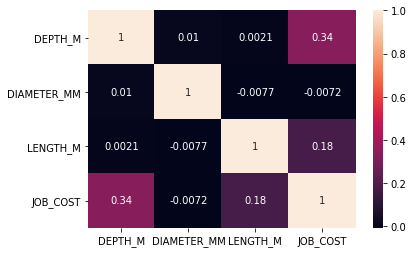

In [40]:
cor = numeric_data.corr()
print(sns.heatmap(cor,annot=True))

[[<AxesSubplot:title={'center':'DEPTH_M'}>
  <AxesSubplot:title={'center':'DIAMETER_MM'}>]
 [<AxesSubplot:title={'center':'JOB_COST'}>
  <AxesSubplot:title={'center':'LENGTH_M'}>]]


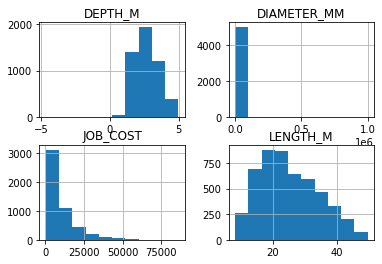

In [41]:
print(arcan.hist())


AxesSubplot(0.125,0.125;0.775x0.755)


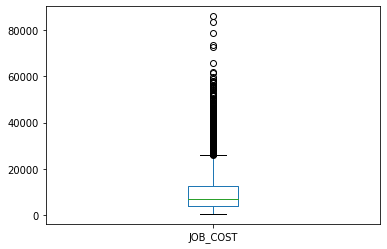

In [92]:
print(arcan.JOB_COST.plot(kind='box'))

Text(0.5, 1.0, 'Job Cost Distribution')

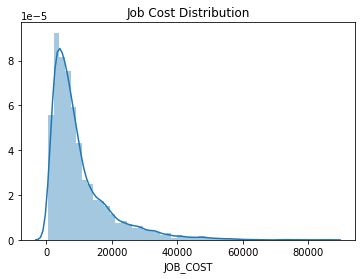

In [42]:
sns.distplot(arcan['JOB_COST']).set_title('Job Cost Distribution')

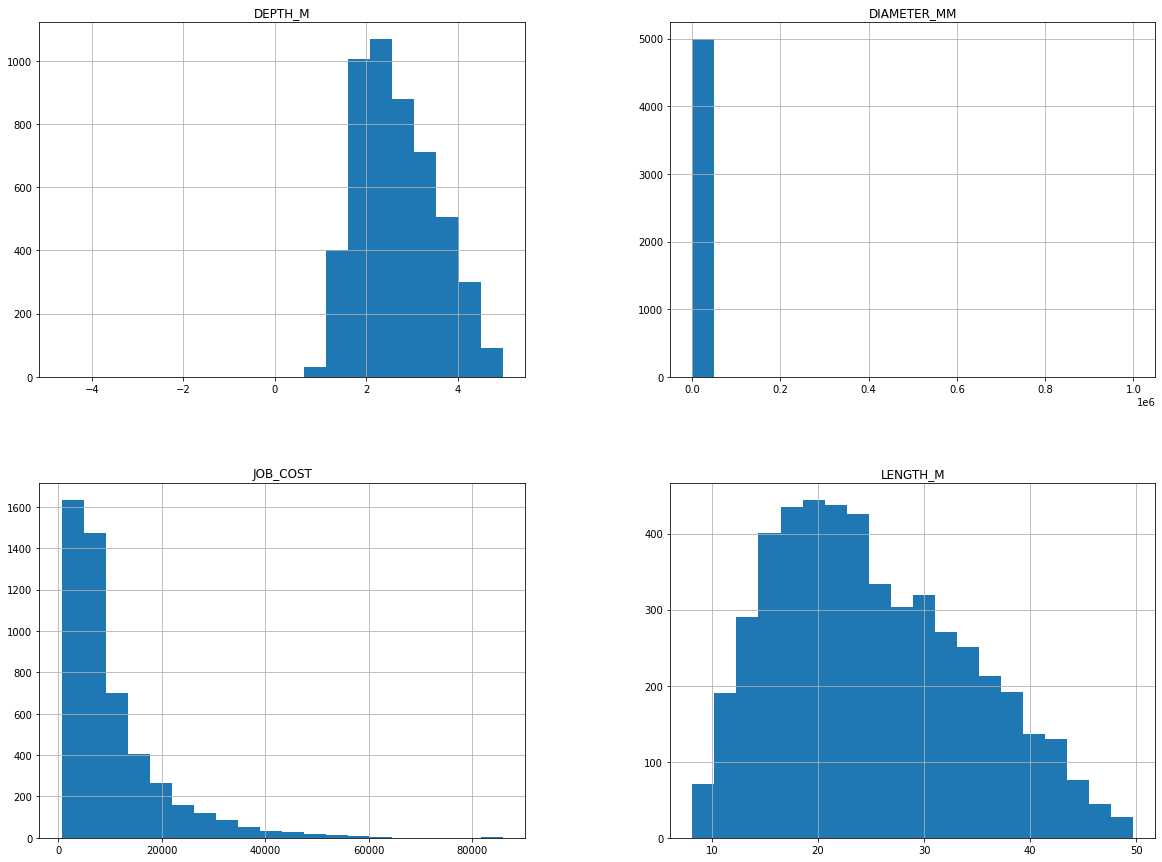

In [121]:
arcan.hist(bins=20, figsize=(20,15))
plt.show()

In [43]:
#checking if the JOB_COST function is normally distributed

import scipy.stats as stats
print(stats.skew(arcan.JOB_COST))

2.253321267756955


In [98]:
W,p = stats.shapiro(arcan.JOB_COST)
print("Shapiro-Wilk: W:{0} p={1}".format(W,p))

Shapiro-Wilk: W:0.7743324041366577 p=0.0


# Splitting the dataset

In [169]:
X = arca[['JOB_ID', 'JOB_TYPE', 'DEPTH_M', 'DIAMETER_MM', 'MATERIAL', 'LENGTH_M']]
y=arca['JOB_COST']
print(X.shape)
print(y.shape)

(4994, 6)
(4994,)


In [170]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
X_train

In [139]:
#dummies = pd.get_dummies(train_set['MATERIAL'])
#dummies
arcan1 = arc.concat([df,pd.get_dummies])

,AC,CI,ST
2667,1,0,0
1597,0,1,0
3757,1,0,0
100,1,0,0
2487,1,0,0
...,...,...,...
4431,0,1,0
469,1,0,0
3096,0,0,1
3777,1,0,0


In [44]:
#converting text labels into numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mat_cat = arcan['MATERIAL']
mat_cat_encoded = encoder.fit_transform(mat_cat)
mat_cat_encoded

array([2, 0, 2, ..., 0, 1, 0])

In [45]:
print(encoder.classes_)

['AC' 'CI' 'ST']


In [46]:
#converting the numerical representation of categorical attributes to only one binary attribute per category - this is to avoid confusing the algorithm
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
mat_cat_1hot = encoder.fit_transform(mat_cat_encoded.reshape(-1,1))
mat_cat_1hot

<4994x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4994 stored elements in Compressed Sparse Row format>

In [47]:
mat_cat_1hot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [48]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
mat_cat_1hot = encoder.fit_transform(mat_cat)
mat_cat_1hot

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [158]:
oneone = pd.DataFrame(mat_cat_1hot)

In [49]:
arcan1 = arcan.copy()
arcan1

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,MATERIAL,LENGTH_M,JOB_COST
0,Job 1,Replace,2.19,200,ST,31.55,19847.644300
1,Job 2,Replace,2.27,63,AC,15.14,4476.588985
2,Job 3,Repair,3.64,450,ST,15.17,16871.484850
3,Job 4,Replace,2.28,200,AC,15.64,11158.144200
4,Job 5,Replace,2.40,200,ST,39.23,16913.611580
...,...,...,...,...,...,...,...
4995,Job 4996,Replace,2.06,125,AC,23.34,9846.054169
4996,Job 4997,Replace,2.17,250,AC,28.22,16475.714440
4997,Job 4998,Repair,3.01,50,AC,18.39,1617.823411
4998,Job 4999,Replace,2.75,50,CI,34.72,5313.796675


In [50]:
arcan2 = arcan.copy()

In [51]:
arcan2 = pd.concat([arcan2,pd.get_dummies(arcan2['MATERIAL'],prefix='material')],axis=1)
arcan2.drop(['MATERIAL'],axis=1,inplace=True)

In [52]:
arcan2

,JOB_ID,JOB_TYPE,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST,material_AC,material_CI,material_ST
0,Job 1,Replace,2.19,200,31.55,19847.644300,0,0,1
1,Job 2,Replace,2.27,63,15.14,4476.588985,1,0,0
2,Job 3,Repair,3.64,450,15.17,16871.484850,0,0,1
3,Job 4,Replace,2.28,200,15.64,11158.144200,1,0,0
4,Job 5,Replace,2.40,200,39.23,16913.611580,0,0,1
...,...,...,...,...,...,...,...,...,...
4995,Job 4996,Replace,2.06,125,23.34,9846.054169,1,0,0
4996,Job 4997,Replace,2.17,250,28.22,16475.714440,1,0,0
4997,Job 4998,Repair,3.01,50,18.39,1617.823411,1,0,0
4998,Job 4999,Replace,2.75,50,34.72,5313.796675,0,1,0


In [53]:
arcan3=arcan2.copy()

In [54]:
arcan3= pd.concat([arcan3,pd.get_dummies(arcan3['JOB_TYPE'],prefix='job_type')],axis=1)
arcan3.drop(['JOB_TYPE'],axis=1,inplace=True)

In [207]:
arcan3

,JOB_ID,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST,material_AC,material_CI,material_ST,job_type_Repair,job_type_Replace
0,Job 1,2.19,200,31.55,19847.644300,0,0,1,0,1
1,Job 2,2.27,63,15.14,4476.588985,1,0,0,0,1
2,Job 3,3.64,450,15.17,16871.484850,0,0,1,1,0
3,Job 4,2.28,200,15.64,11158.144200,1,0,0,0,1
4,Job 5,2.40,200,39.23,16913.611580,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,Job 4996,2.06,125,23.34,9846.054169,1,0,0,0,1
4996,Job 4997,2.17,250,28.22,16475.714440,1,0,0,0,1
4997,Job 4998,3.01,50,18.39,1617.823411,1,0,0,1,0
4998,Job 4999,2.75,50,34.72,5313.796675,0,1,0,0,1


In [55]:
#gen is the transformed version of arcan df, so all the variables are numerical
gen = arcan3.drop(columns=['JOB_ID'])
gen

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST,material_AC,material_CI,material_ST,job_type_Repair,job_type_Replace
0,2.19,200,31.55,19847.644300,0,0,1,0,1
1,2.27,63,15.14,4476.588985,1,0,0,0,1
2,3.64,450,15.17,16871.484850,0,0,1,1,0
3,2.28,200,15.64,11158.144200,1,0,0,0,1
4,2.40,200,39.23,16913.611580,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
4995,2.06,125,23.34,9846.054169,1,0,0,0,1
4996,2.17,250,28.22,16475.714440,1,0,0,0,1
4997,3.01,50,18.39,1617.823411,1,0,0,1,0
4998,2.75,50,34.72,5313.796675,0,1,0,0,1


In [57]:
gen.describe()

,DEPTH_M,DIAMETER_MM,LENGTH_M,JOB_COST,material_AC,material_CI,material_ST,job_type_Repair,job_type_Replace
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,2.670805,733.742491,25.132765,10207.698215,0.512014,0.286544,0.201442,0.298358,0.701642
std,0.853169,24501.573970,9.094583,9534.848466,0.499906,0.452192,0.401117,0.457583,0.457583
min,-4.660000,50.000000,8.160000,586.506169,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.002500,63.000000,17.810000,3978.863093,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.570000,90.000000,23.785000,6986.901196,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.270000,200.000000,31.657500,12884.617365,1.000000,1.000000,0.000000,1.000000,1.000000
max,4.980000,999999.000000,49.710000,85860.133000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
X = gen.drop(['JOB_COST'],axis=1).values
y = gen['JOB_COST'].values

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(np.array(X,dtype=float))
y=np.ravel(y)


TypeError: 'numpy.dtype' object is not callable

In [94]:
print(X.dtype)
print(y.dtype)

float64
float64


In [95]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
y_pred = lin_reg.predict(X_test)
print(y_pred)

[ 1.45897582e+04  1.26522522e+04  6.76814142e+03  7.09198213e+03
  1.62202798e+04  1.09636663e+04  1.43931731e+04  9.73832224e+02
  7.57069310e+03  3.42177010e+03  8.77872593e+03  1.14950542e+04
  1.44204088e+04  1.26683321e+04  6.99566420e+03  5.50712195e+03
  4.69416710e+02  1.85443191e+04  6.90597947e+03  6.03282085e+03
  8.16740006e+03  9.81596946e+03  3.77871130e+03  2.15947331e+03
  5.68214538e+03  1.16127862e+04  5.11861977e+03  9.11040965e+03
  2.14592230e+04  1.21466182e+04  4.46072040e+03  9.75342316e+03
  4.56804821e+03  5.88245799e+03  6.87045525e+03  1.79860730e+04
  1.77113889e+04  1.06327973e+04  8.22981895e+03  8.90241824e+03
  6.62574054e+03  8.61107038e+03  1.04813108e+04  1.49785994e+04
  2.01952374e+04  1.79794333e+04  1.41832772e+04  1.08769708e+04
  1.31314421e+04  9.63174243e+02  1.62602099e+04  1.06576033e+04
  8.14940787e+03  1.53158207e+04  5.85590791e+03  9.48191518e+03
  1.09762479e+03  1.64851134e+04  1.37900398e+04  3.60107832e+03
  1.22835596e+04  1.03647

In [98]:
X_train

array([[  3.28,  63.  ,  24.35, ...,   0.  ,   0.  ,   1.  ],
       [  3.3 ,  90.  ,  24.74, ...,   0.  ,   1.  ,   0.  ],
       [  1.95,  63.  ,  28.61, ...,   0.  ,   1.  ,   0.  ],
       ...,
       [  3.73, 200.  ,  12.24, ...,   1.  ,   1.  ,   0.  ],
       [  2.07, 125.  ,  27.09, ...,   0.  ,   1.  ,   0.  ],
       [  1.68, 250.  ,  11.73, ...,   1.  ,   1.  ,   0.  ]])

In [100]:
y_train

array([7950.353235, 3822.860784, 1727.316744, ..., 7458.153391,
       3268.121865, 3834.648702])

In [102]:
#model evaluation using r^2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3140512805502159

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
y_pred_rmse

7563.011367438009

In [107]:
y_pred_mae = mean_absolute_error(y_test,y_pred)
y_pred_mae

5493.009368046124

Text(0.5, 1.0, 'Actual vs. Predicted')

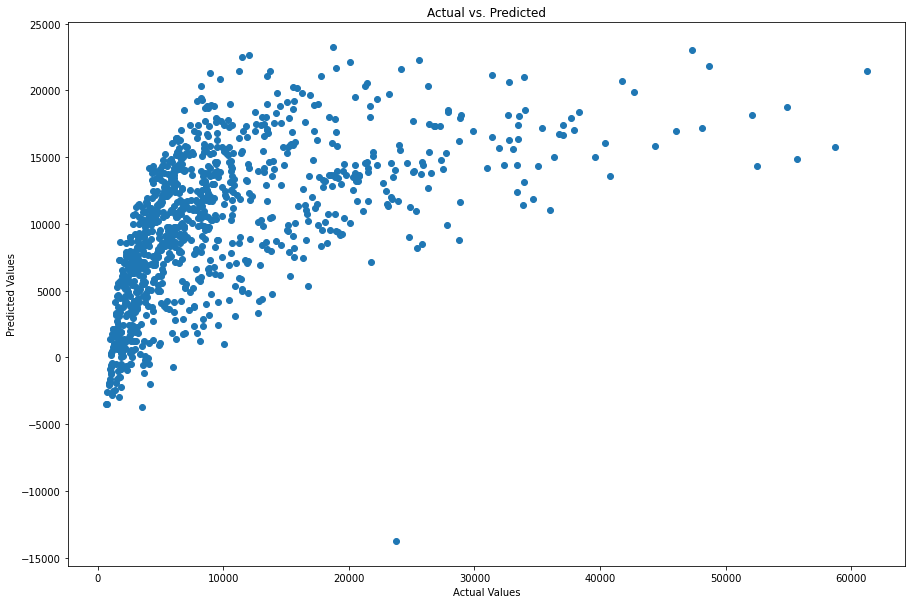

In [104]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')